
# Causal phase estimation example

This example shows how to causally estimate the phase of a signal using two
oscillator models, as described in [1]_.

Uses `meegkit.phase.ResOscillator()` and `meegkit.phase.NonResOscillator()`.

## References
.. [1] Rosenblum, M., Pikovsky, A., Kühn, A.A. et al. Real-time estimation
       of phase and amplitude with application to neural data. Sci Rep 11, 18037
       (2021). https://doi.org/10.1038/s41598-021-97560-5


In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert

from meegkit.phase import NonResOscillator, ResOscillator, locking_based_phase

sys.path.append(os.path.join(".", "tests"))

from test_filters import generate_multi_comp_data, phase_difference  # noqa:E402

rng = np.random.default_rng(5)

## Build data
First, we generate a multi-component signal with amplitude and phase
modulations, as described in the paper [1]_.



In [2]:
npt = 100000
fs = 100
s  = generate_multi_comp_data(npt, fs)  # Generate test data
dt = 1 / fs
time = np.arange(npt) * dt

### Visualize signal
Plot the test signal's Fourier spectrum



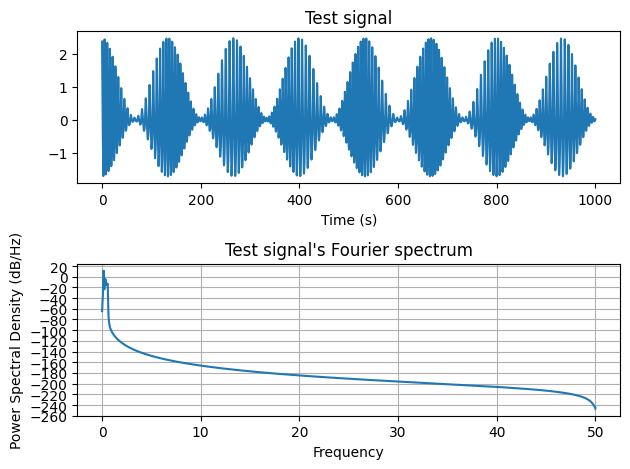

In [3]:
f, ax = plt.subplots(2, 1)
ax[0].plot(time, s)
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Test signal")
ax[1].psd(s, Fs=fs, NFFT=2048*4, noverlap=fs)
ax[1].set_title("Test signal's Fourier spectrum")
plt.tight_layout()

### Compute phase and amplitude
We compute the Hilbert phase and amplitude, as well as the phase and
amplitude obtained by the locking-based technique, non-resonant and
resonant oscillator.



In [4]:
ht_ampl = np.abs(hilbert(s))  # Hilbert amplitude
ht_phase = np.angle(hilbert(s))  # Hilbert phase

lb_phase = locking_based_phase(s, dt, npt)
lb_phi_dif = phase_difference(ht_phase, lb_phase)

osc = NonResOscillator(fs, 1.1)
nr_phase, nr_ampl = osc.transform(s)
nr_phase = nr_phase[:, 0]
nr_phi_dif = phase_difference(ht_phase, nr_phase)

osc = ResOscillator(fs, 1.1)
r_phase, r_ampl = osc.transform(s)
r_phase = r_phase[:, 0]
r_phi_dif = phase_difference(ht_phase, r_phase)

/Users/nbarascud/Github/python-meegkit/meegkit/utils/buffer.py:68: UserWarning: Buffer overflow: some old data has been discarded
  warnings.warn("Buffer overflow: some old data has been discarded")


## Results
Here we reproduce figure 1 from the original paper [1]_.



The first row shows the test signal $s$ and its Hilbert amplitude
$a_H$ ; one can see that ah does not represent a good envelope for
$s$. On the contrary, the Hilbert-based phase estimation yields good
results, and therefore we take it for the ground truth. Rows 2-4 show the
difference between the Hilbert phase and causally estimated phases
($\phi_L$, $\phi_N$, $\phi_R$) are obtained by means of the
locking-based technique, non-resonant and resonant oscillator, respectively).
These panels demonstrate that the output of the developed causal algorithms
is very close to the HT-phase. Notice that we show $\phi_H - \phi_N$
modulo :math:`2\pi, since the phase difference is not bounded.



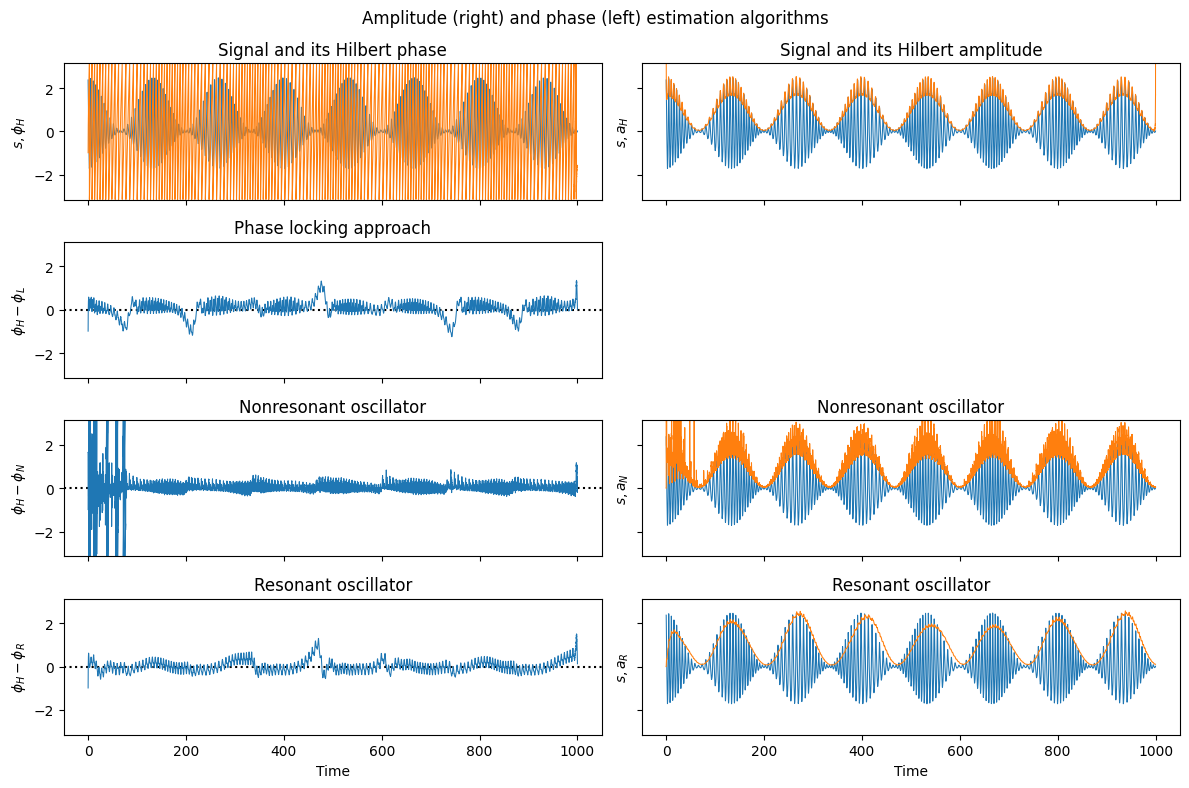

In [5]:
f, ax = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 8))
ax[0, 0].plot(time, s, time, ht_phase, lw=.75)
ax[0, 0].set_ylabel(r"$s,\phi_H$")
ax[0, 0].set_title("Signal and its Hilbert phase")

ax[1, 0].plot(time, lb_phi_dif, lw=.75)
ax[1, 0].axhline(0, color="k", ls=":", zorder=-1)
ax[1, 0].set_ylabel(r"$\phi_H - \phi_L$")
ax[1, 0].set_ylim([-np.pi, np.pi])
ax[1, 0].set_title("Phase locking approach")

ax[2, 0].plot(time, nr_phi_dif, lw=.75)
ax[2, 0].axhline(0, color="k", ls=":", zorder=-1)
ax[2, 0].set_ylabel(r"$\phi_H - \phi_N$")
ax[2, 0].set_ylim([-np.pi, np.pi])
ax[2, 0].set_title("Nonresonant oscillator")

ax[3, 0].plot(time, r_phi_dif, lw=.75)
ax[3, 0].axhline(0, color="k", ls=":", zorder=-1)
ax[3, 0].set_ylim([-np.pi, np.pi])
ax[3, 0].set_ylabel(r"$\phi_H - \phi_R$")
ax[3, 0].set_xlabel("Time")
ax[3, 0].set_title("Resonant oscillator")

ax[0, 1].plot(time, s, time, ht_ampl, lw=.75)
ax[0, 1].set_ylabel(r"$s,a_H$")
ax[0, 1].set_title("Signal and its Hilbert amplitude")

ax[1, 1].axis("off")

ax[2, 1].plot(time, s, time, nr_ampl, lw=.75)
ax[2, 1].set_ylabel(r"$s,a_N$")
ax[2, 1].set_title("Amplitudes")
ax[2, 1].set_title("Nonresonant oscillator")

ax[3, 1].plot(time, s, time, r_ampl, lw=.75)
ax[3, 1].set_xlabel("Time")
ax[3, 1].set_ylabel(r"$s,a_R$")
ax[3, 1].set_title("Resonant oscillator")
plt.suptitle("Amplitude (right) and phase (left) estimation algorithms")
plt.tight_layout()
plt.show()